# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install chart_studio

     |████████████████████████████████| 71kB 8.2MB/s 


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
import plotly.graph_objs as go
from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/6_Donors_choose_NB/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/6_Donors_choose_NB/resources.csv')

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:54<00:00, 1986.85it/s]


In [0]:
preprocessed_essay_count= pd.DataFrame(preprocessed_essays)
project_data['essay_count'] = preprocessed_essay_count[0].str.count(' ')

In [0]:
def preprocessing(x,y):
    from tqdm import tqdm
    import math
    from collections import Counter
    preprocessed_essays = []
    my_count = Counter()
    a=[]
    # tqdm is for printing the status bar
    for sentance in tqdm(x[y].values):
        if sentance!=0:
            sent = decontracted(sentance)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            # https://gist.github.com/sebleier/554280
            sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
            preprocessed_essays.append(sent.lower().strip())
        else:
            preprocessed_essays.append(0)
    return preprocessed_essays

In [22]:
preprocessed_essay1= preprocessing( project_data,"project_essay_1")
preprocessed_essay1= pd.DataFrame(preprocessed_essay1)

100%|██████████| 109248/109248 [00:24<00:00, 4420.95it/s]


In [23]:
preprocessed_essay2= preprocessing( project_data,"project_essay_2")
preprocessed_essay2= pd.DataFrame(preprocessed_essay2)

100%|██████████| 109248/109248 [00:30<00:00, 3530.36it/s]


In [24]:
project_data["project_essay_3"].fillna(0, inplace=True)

preprocessed_essay3= preprocessing( project_data, "project_essay_3")
preprocessed_essay3= pd.DataFrame(preprocessed_essay3)

100%|██████████| 109248/109248 [00:00<00:00, 141371.31it/s]


In [25]:
project_data["project_essay_4"].fillna(0, inplace=True)
preprocessed_essay4= preprocessing( project_data,"project_essay_4")
preprocessed_essay4= pd.DataFrame(preprocessed_essay4)

100%|██████████| 109248/109248 [00:00<00:00, 215148.97it/s]


In [0]:
project_data['essay1'] = preprocessed_essay1[0].str.count(' ')
project_data['essay2'] = preprocessed_essay2[0].str.count(' ')
project_data['essay3'] = preprocessed_essay3[0].str.count(' ')
project_data['essay4'] = preprocessed_essay4[0].str.count(' ')

In [27]:
# after preprocesing
len(preprocessed_essays)

109248

<h2><font color='black'> 1.4 Preprocessing of `project_title`</font></h2>

In [28]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
preprocessed_titles[2]

100%|██████████| 109248/109248 [00:02<00:00, 46650.08it/s]


'mobile learning mobile listening center'

In [0]:
preprocessed_titlec= pd.DataFrame(preprocessed_titles)
project_data['title_count'] = preprocessed_titlec[0].str.count(' ')

### resource summary

In [30]:
from tqdm import tqdm
preprocessed_summary = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_summary.append(sent.lower().strip())
preprocessed_summary[2]

100%|██████████| 109248/109248 [00:05<00:00, 19487.40it/s]


'students need mobile listening center able enhance learning'

## 1.5 Preparing data for models

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_count',
       'essay1', 'essay2', 'essay3', 'essay4', 'title_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/6_Donors_choose_NB/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [34]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [36]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
negative=[]
neutral=[]
positive=[]
compound=[]
#ss = sid.polarity_scores(for_sentiment)
for i in range(0, len(preprocessed_essays)):
    a=sid.polarity_scores(preprocessed_essays[i])
    negative.append(a["neg"])
    neutral.append(a["neu"])
    positive.append(a["pos"])
    compound.append(a["compound"])

print(len(negative))
print(len(neutral))
print(len(positive))
print(len(compound))
    


#for k in ss:
#    print('{0}: {1}, '.format(k, ss[k]), end='')
#print(ss["neg"])
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

109248
109248
109248
109248


<h1>2. Support Vector Machines

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [38]:
#prepare a dataframe  
print(project_data.columns)
#print(project_data["Date"].head(10))
#must inlcude categories,subcategories, preprocessed essay,preprocessed title,state,grade and prefix
print("="*70)
important_data= project_data[['teacher_number_of_previously_posted_projects','teacher_prefix', 'school_state','Date', 'project_grade_category','project_is_approved','clean_categories', 'clean_subcategories','price']].copy()
#include preprocessed titles,essays
#important_data = important_data.sort_values(by = "Date")
#print(important_data["Date"].head(10))
important_data["teacher_prefix"].fillna("None", inplace = True)
important_data["processed_essays"]= preprocessed_essays
important_data["processed_titles"]= preprocessed_titles
important_data["processed_summary"]= preprocessed_summary
important_data['title_count']= project_data['title_count']
important_data["essay_count"]= project_data['essay_count']
important_data["essay1"]= project_data['essay1']
important_data["essay2"]= project_data['essay2']
important_data["essay3"]= project_data['essay3']
important_data["essay4"]= project_data['essay4']
important_data["essay3"].fillna(0, inplace=True)
important_data["essay4"].fillna(0, inplace=True)
important_data["negative_score"]= negative 
important_data["neutral_score"]= neutral
important_data["positive_score"]= positive
important_data["compound_score"]= compound


print(important_data.columns)
print("="*70)
print("shape of new data is: ",important_data.shape)
#important_data.project_is_approved = important_data.project_is_approved.map({0.0: -1, 1.0: 1})


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_count',
       'essay1', 'essay2', 'essay3', 'essay4', 'title_count', 'price',
       'quantity'],
      dtype='object')
Index(['teacher_number_of_previously_posted_projects', 'teacher_prefix',
       'school_state', 'Date', 'project_grade_category', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'price', 'processed_essays',
       'processed_titles', 'processed_summary', 'title_count', 'essay_count',
       'essay1', 'essay2', 'essay3', 'essay4', 'negative_score',
       'neutral_score', 'positive_score', 'compound_score'],
      dtype='object')
shape of new data is:  (10

In [0]:
#splitting data into train test and cv
#https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
from sklearn.model_selection import train_test_split
train_data1, data_test= train_test_split(important_data, test_size=0.2, random_state=0)#splitting data into train and test
data_train, data_cv= train_test_split(train_data1, test_size= 0.25, random_state=0)
Y_train= data_train["project_is_approved"].values.reshape(-1,1)
Y_test=  data_test["project_is_approved"].values.reshape(-1,1)
Y_cv=  data_cv["project_is_approved"].values.reshape(-1,1)


In [40]:
print("the shape of train data is: ",data_train.shape) 
print("the shape of test data is: ",data_test.shape)
print("the shape of cv data is: ",data_cv.shape)
data_train["essay_count"].shape

the shape of train data is:  (65548, 22)
the shape of test data is:  (21850, 22)
the shape of cv data is:  (21850, 22)


(65548,)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features, essays and titles</h2>

In [0]:
def pre_model(y,x): #subfunction
    if y==1:
        #project_essay
        #avg_w2v
        avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
        for sentence in tqdm(x.processed_essays): # for each review/sentence
            vector = np.zeros(300) # as word vectors are of zero length
            cnt_words =0; # num of words with a valid vector in the sentence/review
            for word in sentence.split(): # for each word in a review/sentence
                if word in glove_words:
                    vector += model[word]
                    cnt_words += 1
            if cnt_words != 0:
                vector /= cnt_words
            avg_w2v_vectors.append(vector)
        avg_w2v_vectors_array= np.array(avg_w2v_vectors)
        A=avg_w2v_vectors_array
        #print("The shape of matrix after one hot encoding(AVG-V2V): ",avg_w2v_vectors_array.shape)
        #print("="*50)

        #project_title
        #avg_w2v
        avg_w2vt = []; # the avg-w2v for each sentence/review is stored in this list
        for sentence in x.processed_titles: # for each review/sentence
            vector = np.zeros(300) # as word vectors are of zero length
            cnt_words =0; # num of words with a valid vector in the sentence/review
            for word in sentence.split(): # for each word in a review/sentence
                if word in glove_words:
                    vector += model[word]
                    cnt_words += 1
            if cnt_words != 0:
                vector /= cnt_words
            avg_w2vt.append(vector)
        avg_w2vt_array= np.array(avg_w2vt)
        B=avg_w2vt_array
        
        #project_summary
        #avg_w2v
        avg_w2vtc = []; # the avg-w2v for each sentence/review is stored in this list
        for sentence in x.processed_summary: # for each review/sentence
            vector = np.zeros(300) # as word vectors are of zero length
            cnt_words =0; # num of words with a valid vector in the sentence/review
            for word in sentence.split(): # for each word in a review/sentence
                if word in glove_words:
                    vector += model[word]
                    cnt_words += 1
            if cnt_words != 0:
                vector /= cnt_words
            avg_w2vtc.append(vector)
        avg_w2vt_arrayc= np.array(avg_w2vtc)
        C=avg_w2vt_arrayc
 
        return A,B,C
    if y==2:
        #project_essay
        #tfidf_w2v
        tfidf_model = TfidfVectorizer()
        tfidf_model.fit(x.processed_essays)
        # we are converting a dictionary with word as a key, and the idf as a value
        dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
        tfidf_words = set(tfidf_model.get_feature_names())

        # compute average word2vec for each review.
        tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
        for sentence in tqdm(x.processed_essays): # for each review/sentence
            vector = np.zeros(300) # as word vectors are of zero length
            tf_idf_weight =0; # num of words with a valid vector in the sentence/review
            for word in sentence.split(): # for each word in a review/sentence
                if (word in glove_words) and (word in tfidf_words):
                    vec = model[word] # getting the vector for each word
                    # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                    tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                    vector += (vec * tf_idf) # calculating tfidf weighted w2v
                    tf_idf_weight += tf_idf
            if tf_idf_weight != 0:
                vector /= tf_idf_weight
            tfidf_w2v_vectors.append(vector)
        tfidf_w2v_vectors_array= np.array(tfidf_w2v_vectors)
        #print(len(tfidf_w2v_vectors[1]))
        A= tfidf_w2v_vectors_array 
        #print("The shape of matrix after one hot encoding(TFIDF-W2V): ",tfidf_w2v_vectors_array.shape)

        #project_title
        #tfidf_w2v
        tfidf_models = TfidfVectorizer()
        tfidf_models.fit(x.processed_titles)
        # we are converting a dictionary with word as a key, and the idf as a value
        dictionary = dict(zip(tfidf_models.get_feature_names(), list(tfidf_models.idf_)))
        tfidf_word = set(tfidf_models.get_feature_names())

        # compute average word2vec for each review.
        tfidf_w2vt = []; # the avg-w2v for each sentence/review is stored in this list
        for sentence in x.processed_titles: # for each review/sentence
            vector = np.zeros(300) # as word vectors are of zero length
            tf_idf_weight =0; # num of words with a valid vector in the sentence/review
            for word in sentence.split(): # for each word in a review/sentence
                if (word in glove_words) and (word in tfidf_word):
                    vec = model[word] # getting the vector for each word
                    # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                    tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                    vector += (vec * tf_idf) # calculating tfidf weighted w2v
                    tf_idf_weight += tf_idf
            if tf_idf_weight != 0:
                vector /= tf_idf_weight
            tfidf_w2vt.append(vector)
        #print(len(tfidf_w2vt[1]))    
        tfidf_w2vt_array= np.array(tfidf_w2vt)
        B=tfidf_w2vt_array
        
        #summary
        tfidf_w2vtc = []; # the avg-w2v for each sentence/review is stored in this list
        for sentence in x.processed_summary: # for each review/sentence
            vector = np.zeros(300) # as word vectors are of zero length
            tf_idf_weight =0; # num of words with a valid vector in the sentence/review
            for word in sentence.split(): # for each word in a review/sentence
                if (word in glove_words) and (word in tfidf_word):
                    vec = model[word] # getting the vector for each word
                    # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                    tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                    vector += (vec * tf_idf) # calculating tfidf weighted w2v
                    tf_idf_weight += tf_idf
            if tf_idf_weight != 0:
                vector /= tf_idf_weight
            tfidf_w2vtc.append(vector)
        #print(len(tfidf_w2vt[1]))    
        tfidf_w2vt_arrayc= np.array(tfidf_w2vtc)
        C=tfidf_w2vt_array
        
        return A,B,C  

In [0]:
def data_modelling(y,x,z,u):#function for vectorizing numerical,categorical data along with essays and titles
    %matplotlib inline
    import warnings
    warnings.filterwarnings("ignore")

    import sqlite3
    import pandas as pd
    import numpy as np
    import nltk
    import string
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_extraction.text import TfidfVectorizer

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc
    from nltk.stem.porter import PorterStemmer

    import re
    # Tutorial about Python regular expressions: https://pymotw.com/2/re/
    import string
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer

    from gensim.models import Word2Vec
    from gensim.models import KeyedVectors
    import pickle

    from tqdm import tqdm
    import os

    from collections import Counter
    
    #state encoding
    from collections import Counter
    my_count = Counter()
    for wor in x['school_state'].values:
        my_count.update(wor.split())
    cat_dicti = dict(my_count)
    #print(my_count)
    sorted_cat_dicti = dict(sorted(cat_dicti.items(), key=lambda kv: kv[1]))

    vectorize = CountVectorizer(vocabulary=list(sorted_cat_dicti.keys()), lowercase=False, binary=True)
    vectorize.fit(x['school_state'].values)
    a1= vectorize.get_feature_names()

    categories_state = vectorize.transform(x['school_state'].values)
    categories_state1 = vectorize.transform(z['school_state'].values)
    categories_state2 = vectorize.transform(u['school_state'].values)
    #print("Shape of matrix after one hot encodig ",categories_state.shape)
    #print("="*50)
    ##############

    #teacher_prefix encoding
    from tqdm import tqdm
    import string
    
    #https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
    my_coun = Counter()
    for wo in x.teacher_prefix.values:
        my_coun.update(wo.split())
    cat_dictio = dict(my_coun)
    sorted_cat_dictio = dict(sorted(cat_dictio.items(), key=lambda kv: kv[1]))

    vectoriz = CountVectorizer(vocabulary=list(sorted_cat_dictio.keys()), lowercase=False, binary=True)
    vectoriz.fit(x['teacher_prefix'].values)
    a2= vectoriz.get_feature_names()#print(vectoriz.get_feature_names())
    categories_prefix = vectoriz.transform(x['teacher_prefix'].values)
    categories_prefix1 = vectoriz.transform(z['teacher_prefix'].values)
    categories_prefix2 = vectoriz.transform(u['teacher_prefix'].values)
    #print("Shape of matrix after one hot encoding ",categories_prefix.shape)
    #print("="*50)


    #project grade category
    my_count = Counter()
    for w in x['project_grade_category'].values:
        my_count.update(w.split(","))
    cat_dic = dict(my_count)
    sorted_cat_dic = dict(sorted(cat_dic.items(), key=lambda kv: kv[1]))

    vector = CountVectorizer(vocabulary=list(sorted_cat_dic.keys()), lowercase=False, binary=True)
    vector.fit(x['project_grade_category'].values)
    a3= vector.get_feature_names()
    categories_grade= vector.transform(x['project_grade_category'].values)
    categories_grade1= vector.transform(z['project_grade_category'].values)
    categories_grade2= vector.transform(u['project_grade_category'].values)
    #print("Shape of matrix after one hot encoding ",categories_grade.shape)
    #print("="*50)


    #categories_encoding
    from collections import Counter
    my_counter = Counter()
    for word in x['clean_categories'].values:
        my_counter.update(word.split())

    cat_dict = dict(my_counter)
    sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
    categories_one_hot= vectorizer.fit_transform(x['clean_categories'].values)
    categories_one_hot1= vectorizer.fit_transform(z['clean_categories'].values)
    categories_one_hot2= vectorizer.fit_transform(u['clean_categories'].values)
    a4= vectorizer.get_feature_names()
    #print("Shape of matrix after one hot encoding ",categories_one_hot.shape)
    #print("="*50)


    #sub_categories_encoding
    my_counter = Counter()
    for word in x['clean_subcategories'].values:
        my_counter.update(word.split())    
    sub_cat_dict = dict(my_counter)
    sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

    vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
    sub_categories_one_hot = vectorizer.fit_transform(x['clean_subcategories'].values)
    sub_categories_one_hot1 = vectorizer.fit_transform(z['clean_subcategories'].values)
    sub_categories_one_hot2 = vectorizer.fit_transform(u['clean_subcategories'].values)
    a5= vectorizer.get_feature_names()
    #rint("Shape of matrix after one hot encoding ",sub_categories_one_hot.shape)
    #print("="*50)

    #price_standardization
    from sklearn.preprocessing import StandardScaler

    # price_standardized = standardScalar.fit(project_data['price'].values)
    # this will rise the error
    # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
    # Reshape your data either using array.reshape(-1, 1)

    price_scalar = StandardScaler()
    price_scalar.fit(x['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
    price_standardized= price_scalar.transform(x['price'].values.reshape(-1, 1))
    price_standardized1= price_scalar.transform(z['price'].values.reshape(-1, 1))
    price_standardized2= price_scalar.transform(u['price'].values.reshape(-1, 1))
    #print("the shape of matrix for price is: ", price_standardized.shape)
    #print("="*50)
    a6= ["price"]
    #number_of_previously_posted_projects
    from sklearn.preprocessing import StandardScaler
    project_scalar = StandardScaler()
    project_scalar.fit(x['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
    project_standardized= project_scalar.transform(x['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
    project_standardized1= project_scalar.transform(z['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
    project_standardized2= project_scalar.transform(u['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
    a7= ["number_of_projects"]
    #print("the shape of matrix for price is: ", price_standardized.shape)
    #print("="*50)
    from scipy.sparse import hstack
    if y==0:
        from sklearn.preprocessing import StandardScaler
        from sklearn import decomposition
        #standarizing essay count
        essay_scalar= StandardScaler()
        essay_scalar.fit(x["essay_count"].values.reshape(-1, 1))
        essays= essay_scalar.transform(x["essay_count"].values.reshape(-1, 1))
        essays1= essay_scalar.transform(z["essay_count"].values.reshape(-1, 1))
        essays2= essay_scalar.transform(u["essay_count"].values.reshape(-1, 1))
        
        #standardizing title count
        title_scalar= StandardScaler()
        title_scalar.fit(x["title_count"].values.reshape(-1, 1))
        titles= title_scalar.transform(x["title_count"].values.reshape(-1, 1))
        titles1= title_scalar.transform(z["title_count"].values.reshape(-1, 1))
        titles2= title_scalar.transform(u["title_count"].values.reshape(-1, 1))
        
        vectorizer = TfidfVectorizer(min_df=45)
        vectorizer.fit(x.processed_essays)
        #a8= vectorizer.get_feature_names()
        A= vectorizer.transform(x.processed_essays)
        #print(A.shape)
        B= vectorizer.transform(z.processed_essays)
        C= vectorizer.transform(u.processed_essays)
        #print(A.shape)
        from sklearn.decomposition import TruncatedSVD
        svd= TruncatedSVD(n_components=1250, algorithm="randomized", n_iter=5)
        svd.fit(A)
        A1= svd.transform(A)
        A2= svd.transform(B)
        A3= svd.transform(C)
        #################################################
        # svd for dimensionality redcution (non-visualization)
        svd1= decomposition.TruncatedSVD()

        svd1.n_components = 7000
        svd_data = svd1.fit_transform(A)

        percentage_var_explained = svd1.explained_variance_ / np.sum(svd1.explained_variance_);

        cum_var_explained = np.cumsum(percentage_var_explained)

        # Plot the PCA spectrum
        plt.figure(1, figsize=(6, 4))

        plt.clf()
        plt.plot(cum_var_explained, linewidth=2)
        plt.axis('tight')
        plt.grid()
        plt.xlabel('n_components')
        plt.ylabel('Cumulative_explained_variance')
        plt.title("plot to find optimal number of n components")
        plt.show()     
        ####################################################
        from scipy.sparse import hstack
        X_model= hstack((project_standardized,categories_prefix,categories_state,categories_grade,categories_one_hot,sub_categories_one_hot,price_standardized,essays,titles, A1, x["compound_score"].values.reshape(-1,1), x["neutral_score"].values.reshape(-1,1), x["negative_score"].values.reshape(-1,1), x["positive_score"].values.reshape(-1,1)))
        Y_model= hstack((project_standardized1,categories_prefix1,categories_state1,categories_grade1,categories_one_hot1,sub_categories_one_hot1,price_standardized1,essays1,titles1, A2,z["compound_score"].values.reshape(-1,1), z["neutral_score"].values.reshape(-1,1), z["negative_score"].values.reshape(-1,1), z["positive_score"].values.reshape(-1,1)))
        Z_model= hstack((project_standardized2,categories_prefix2,categories_state2,categories_grade2,categories_one_hot2,sub_categories_one_hot2,price_standardized2,essays2,titles2, A3,u["compound_score"].values.reshape(-1,1), u["neutral_score"].values.reshape(-1,1), u["negative_score"].values.reshape(-1,1), u["positive_score"].values.reshape(-1,1)))
        
        #print("x model", X_model.shape)
        X_model= X_model.tocsr()
        Y_model= Y_model.tocsr()
        Z_model= Z_model.tocsr()
        #afinal= a7+a2+a1+a3+a4+a5+a6+a8+a10+a9
        #X_model= X_model[:, :-2]
        #print(X_model.shape)
        return X_model,Y_model,Z_model
    if y==1:
        #project_essay 
        #bow
        vectorizer = CountVectorizer(min_df=5)
        vectorizer.fit(x.processed_essays)
        a8= vectorizer.get_feature_names()
        text_bow= vectorizer.transform(x.processed_essays)
        print("The shape of essay words after applying BOW: ",text_bow.shape)
        A= text_bow
        #print("Shape of matrix after one hot encoding(BOW): ",text_bow.shape)
        #print("="*50)
        ###########
        #summary
        vectorizerc = CountVectorizer(min_df=5)
        vectorizerc.fit(x.processed_summary)
        a9= vectorizerc.get_feature_names()
        resource_bow= vectorizerc.transform(x.processed_summary)
        A1= resource_bow
        #project_title
        #bow
        vectorizers = CountVectorizer(min_df=5)
        vectorizers.fit(x.processed_titles)
        a10= vectorizers.get_feature_names()
        text_bowt= vectorizers.transform(x.processed_titles)
        B= text_bowt
        #print(B.shape)
        from scipy.sparse import hstack
        D=vectorizer.transform(z.processed_essays)
        A2= vectorizerc.transform(z.processed_summary)
        #print(D.shape)
        E=vectorizers.transform(z.processed_titles)
        #print(E.shape)
        #a_b= z  
        F=vectorizer.transform(u.processed_essays)
        G=vectorizers.transform(u.processed_titles)
        A3= vectorizerc.transform(u.processed_summary)
    
        print("All the features are encoded successfully and BOW is used! ")
        #print("="*50)
    if y==2:
        #project_essay
        #tfidf
        vectorizer = TfidfVectorizer(min_df=5)
        vectorizer.fit(x.processed_essays)
        a8= vectorizer.get_feature_names()
        text_tfidf= vectorizer.transform(x.processed_essays)
        print("The shape of essay words after applying BOW: ",text_tfidf.shape)
        A= text_tfidf
        
        #print("Shape of matrix after one hot encoding(BOW): ",text_bow.shape)
        #print("="*50)
        #review
        vectorizerc = TfidfVectorizer(min_df=5)
        vectorizerc.fit(x.processed_summary)
        a10= vectorizerc.get_feature_names()
        A1= vectorizerc.transform(x.processed_summary)
        A2= vectorizerc.transform(z.processed_summary)
        A3= vectorizerc.transform(u.processed_summary)
        
        
        #project_title
        vectorizers = TfidfVectorizer(min_df=5)
        vectorizers.fit(x.processed_titles)
        a9= vectorizers.get_feature_names()
        text_tfidft= vectorizers.transform(x.processed_titles)
        B= text_tfidft
        #print(B.shape)
        from scipy.sparse import hstack
        D=vectorizer.transform(z.processed_essays)
        #print(D.shape)
        E=vectorizers.transform(z.processed_titles)   
        F=vectorizer.transform(u.processed_essays)
        G=vectorizers.transform(u.processed_titles)
        print("All the features are encoded successfully and TF-IDF is used! ")
        #print("="*50)
    if y==3:
        A,B,A1= pre_model(1,x)
        D,E,A2= pre_model(1,z)
        F,G,A3= pre_model(1,u)
        print("All the features are encoded successfully and AVG-W2V is used! ")
    if y==4:
        A,B,A1= pre_model(2,x)
        D,E,A2= pre_model(2,z)
        F,G,A3= pre_model(2,u)

        print("All the features are encoded successfully and TFIDF-W2V is used! ")
    from scipy.sparse import hstack
    X_model= hstack((project_standardized,categories_prefix,categories_state,categories_grade,categories_one_hot,sub_categories_one_hot,price_standardized,A,B,A1))
    Y_model= hstack((project_standardized1,categories_prefix1,categories_state1,categories_grade1,categories_one_hot1,sub_categories_one_hot1,price_standardized1,D,E,A2))
    Z_model= hstack((project_standardized2,categories_prefix2,categories_state2,categories_grade2,categories_one_hot2,sub_categories_one_hot2,price_standardized2,F,G,A3))
    #print("x model", X_model.shape)
    X_model= X_model.tocsr()
    Y_model= Y_model.tocsr()
    Z_model= Z_model.tocsr()
    #afinal= a7+a2+a1+a3+a4+a5+a6+a8+a10+a9
    #X_model= X_model[:, :-2]
    #print(X_model.shape)
    return X_model,Y_model,Z_model


In [0]:
def SCV(x,y,x1,y1,z,z1): #function for simple cross validation and calculation of auc for different alphas   
    train_auc = []
    cv_auc = []
    from sklearn.metrics import roc_curve, auc
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import roc_auc_score
    from matplotlib import pylab
    from tqdm import tqdm
    from sklearn.calibration import CalibratedClassifierCV 
    import math
    import numpy as np
    x11_train=x
    y11_train= y
    #k1 = np.arange(0,2,0.0001)
    k1= [0.0001,0.0001,0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,100,1000,10000]
    k2=[]
    k3=[]
    for j in k1:
        k2.append(math.log(j))
        k3.append([math.log(j),j])
    #print(k3)    
    for i in k1:
        neigh = SGDClassifier(loss="hinge", penalty=z, alpha=i, class_weight= "balanced")
        neigh.fit(x,y)
        calibrator = CalibratedClassifierCV(neigh, cv='prefit')
        calibrator.fit(x11_train,y11_train )
        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs
        predicted_labels = []
        for j in range(0, 65548, 1000):
            predicted_labels.extend(calibrator.predict_proba(x[j:j+1000])[:,1])

        #print(len(predicted_labels))
        predicted_labelss = []
        for k in range(0, 21850, 1000):
            predicted_labelss.extend(calibrator.predict_proba(x1[k:k+1000])[:,1])

        #y_train_pred =  neigh.predict_proba(x1_train)[:,1]
        #y_cv_pred =  neigh.predict_proba(x1_cv)[:,1]
        #print(len(predicted_labelss))

        train_auc.append(roc_auc_score(y,predicted_labels))
        cv_auc.append(roc_auc_score(y1, predicted_labelss))


    plt.plot(k2, train_auc, label='Train AUC')
    pylab.ylim([0,1])
    plt.plot(k2, cv_auc, label='CV AUC')
    pylab.ylim([0,1])
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")

    if z1==1:
        plt.title("Error plot with L1 regularisation")
    if z1==2:
        plt.title("Error plot with L2 regularisation")
    plt.show()

In [0]:
def AUC(x,y,x1,y1,z,c): #function for testing data
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import roc_auc_score
    from sklearn.linear_model import SGDClassifier
    from sklearn.calibration import CalibratedClassifierCV
    x11_train=x
    y11_train= y
    neigh = SGDClassifier(loss="hinge", penalty=z, alpha=c, class_weight= "balanced")
    neigh.fit(x, y)
    calibrator = CalibratedClassifierCV(neigh, cv='prefit')
    calibrator.fit(x11_train,y11_train )
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    predicted_labels=[]
    predicted_labelss=[]
    for j in tqdm(range(0, 65548, 1000)):
        predicted_labels.extend(calibrator.predict_proba(x[j:j+1000])[:,1])
    for m in range(0, 21850, 1000):
        predicted_labelss.extend(calibrator.predict_proba(x1[m:m+1000])[:,1])    


    train_fpr, train_tpr, threshold = roc_curve(y, predicted_labels)
    test_fpr, test_tpr, thresholds = roc_curve(y1, predicted_labelss)
    #print(train_fpr[0:150])
    #print(threshold[0:150])
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(np.round(auc(train_fpr, train_tpr),3)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(np.round(auc(test_fpr, test_tpr),3)))
    plt.legend()
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("AUC")
    plt.show()

    

    #from sklearn.metrics import confusion_matrix
    #print("Train confusion matrix")
    #print(confusion_matrix(y_train, neigh.predict(X_train_bow)))
    #print("Test confusion matrix")
    #print(confusion_matrix(y_test, neigh.predict(X_test_bow)))

In [0]:
def confusion(x1,y1,x2,y2,z,c): #function for plotting confusion matrix
    from sklearn.metrics import confusion_matrix#https://seaborn.pydata.org/generated/seaborn.heatmap.html
    import seaborn as sns
    from sklearn.metrics import roc_curve, auc
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import SGDClassifier
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.metrics import roc_auc_score
    x11_train= x1
    y11_train= y1
    neigh = SGDClassifier(loss="hinge", penalty=z, alpha=c, class_weight= "balanced")
    neigh.fit(x1, y1)


    predicted_labels=[]
    predicted_labelss=[]
    for j in tqdm(range(0, 65548, 1000)):
        predicted_labels.extend(neigh.predict(x1[j:j+1000]))
    for m in range(0, 21850, 1000):
        predicted_labelss.extend(neigh.predict(x2[m:m+1000]))    

    confusion= confusion_matrix(y1, predicted_labels)
    confusion_test= confusion_matrix(y2, predicted_labelss)
    label= ["0","1"]
    confusion_pd = pd.DataFrame(confusion, index= label, columns= label)
    confusion_test_pd= pd.DataFrame(confusion_test, index= label, columns= label)

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_pd, annot= True, fmt= "d")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix for Train data")
    plt.subplot(1,2,2)
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix for Test data")
    sns.heatmap(confusion_test, annot= True, fmt= "d")
    plt.show()
    from sklearn.metrics import classification_report
    print("Metrics for Test data""\n", classification_report(Y_train, predicted_labels))
    print("Metrics for Train data""\n", classification_report(Y_test, predicted_labelss)) 
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

In [47]:
#emcoding data using data modelling function
x1_train, x1_test,x1_cv= data_modelling(1,data_train,data_test,data_cv)
print("The shape of training data after encoding: ",x1_train.shape , "Y_train: ", Y_train.shape)
print("The shape of testing data after encoding: ",x1_test.shape , "Y_test: ", Y_test.shape)
print("The shape of cross validation data after encoding: ",x1_cv.shape,"Y_cv: ",Y_cv.shape)

The shape of essay words after applying BOW:  (65548, 18172)
All the features are encoded successfully and BOW is used! 
The shape of training data after encoding:  (65548, 28477) Y_train:  (65548, 1)
The shape of testing data after encoding:  (21850, 28477) Y_test:  (21850, 1)
The shape of cross validation data after encoding:  (21850, 28477) Y_cv:  (21850, 1)


### Simple Cross validation(Maximum AUC value)

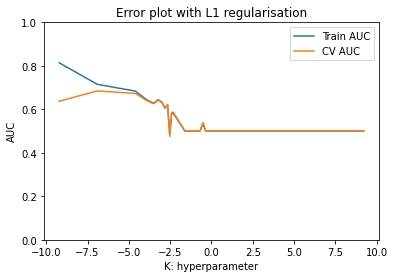

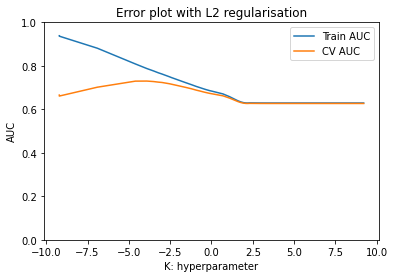

In [48]:
SCV(x1_train,Y_train,x1_cv,Y_cv,"l1",1)
SCV(x1_train,Y_train,x1_cv,Y_cv,"l2",2)

#### Observations
    1. After applying linear SGDclassifier on BOW model, the model is obtained for both L1 and L2 regularisation.
    2. L2 regularisation works better than L1 regularisation.
    2. We can find that at alpha=0.001 the model works well for both train and test cv. Hence we can consider alpha =0.01
       as our optimal hyperparameter.
    3. As alpha value increases, We can say that the model tends to underfit, and as the value of alpha decreases, the model
       overfits.
    4. As the data is unbalanced, We used the feature balanced to assign weights for majority and minority class.

### Testing with Test data

100%|██████████| 66/66 [00:00<00:00, 472.26it/s]


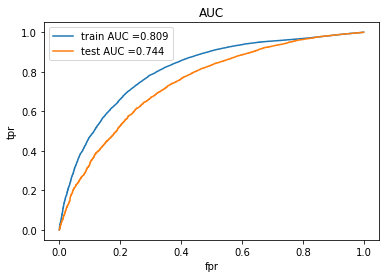

In [49]:
AUC(x1_train,Y_train,x1_test,Y_test,"l2",0.01)

#### Observations
    1. We observe that the area under curve or the Roc plot shows that both train and test have an area of nearly
       0.809 and 0.744.
    2. After testing with various values of alpha, such an optimized result has been obtained.
    3. As alpha value increases,the data tends to underfit and as alpha values decreases,the data tends to overfit.
    3. After multiple trials, we find that the AUC is highest for alpha= 0.01.

### Confusion matrix

100%|██████████| 66/66 [00:00<00:00, 721.12it/s]


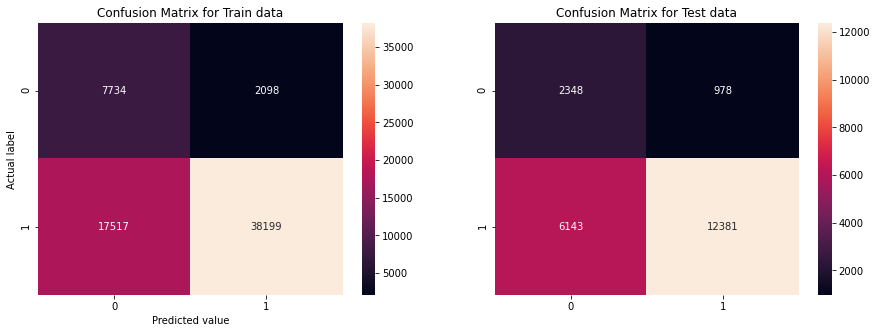

Metrics for Test data
               precision    recall  f1-score   support

           0       0.31      0.79      0.44      9832
           1       0.95      0.69      0.80     55716

    accuracy                           0.70     65548
   macro avg       0.63      0.74      0.62     65548
weighted avg       0.85      0.70      0.74     65548

Metrics for Train data
               precision    recall  f1-score   support

           0       0.28      0.71      0.40      3326
           1       0.93      0.67      0.78     18524

    accuracy                           0.67     21850
   macro avg       0.60      0.69      0.59     21850
weighted avg       0.83      0.67      0.72     21850



In [50]:
confusion(x1_train,Y_train,x1_test,Y_test,"l2",0.01)

##### Definitions
       1.True Postive: A true positive is an outcome where the model correctly predicts the positive class.
       2.True Negative: A true negative is an outcome where the model correctly predicts the negative class.
       3.False positive: A false positive is an outcome where the model incorrectly predicts the positive class.
       4.False negative: A false negative is an outcome where the model incorrectly predicts the negative class.
#### Observations
        1. We find that the best accuracy of our model on test data is 70% 
        2. Here linear SGDclassifier performs better than Naive Bayes and KNN.
        3. The Recall is 0.69 and 0.79 for positive and negative class respectively
        4. We find that false positives and false negatives are significantly less
        5. The computation time is better than that of KNN

### 2.4.2 Applying SVM on TFIDF,<font color='red'> SET 2</font>

In [51]:
#emcoding data using data modelling function
x2_train, x2_test,x2_cv= data_modelling(2,data_train,data_test,data_cv)
print("The shape of training data after encoding: ",x2_train.shape , "Y_train: ", Y_train.shape)
print("The shape of testing data after encoding: ",x2_test.shape , "Y_test: ", Y_test.shape)
print("The shape of cross validation data after encoding: ",x2_cv.shape,"Y_cv: ",Y_cv.shape)

The shape of essay words after applying BOW:  (65548, 18172)
All the features are encoded successfully and TF-IDF is used! 
The shape of training data after encoding:  (65548, 28477) Y_train:  (65548, 1)
The shape of testing data after encoding:  (21850, 28477) Y_test:  (21850, 1)
The shape of cross validation data after encoding:  (21850, 28477) Y_cv:  (21850, 1)


### Simple Cross Validation

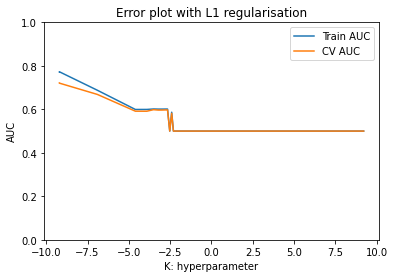

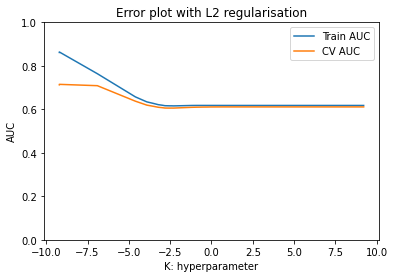

In [52]:
SCV(x2_train,Y_train,x2_cv,Y_cv,"l1",1)
SCV(x2_train,Y_train,x2_cv,Y_cv,"l2",2)

#### Observations
    1. After applying linear SGDclassifier on TF-IDF model, the model is obtained for both L1 and L2 regularisation.
    2. L2 regularisation works better than L1 regularisation.
    2. We can find that at alpha=0.0001 the model works well for both train and test cv. Hence we can consider alpha =0.0001
       as our optimal hyperparameter.
    3. As alpha value increases, We can say that the model tends to underfit, and as the value of alpha decreases, the model
       overfits.
    4. As the data is unbalanced, We used the feature balanced to assign weights for majority and minority class.

### Testing with Test data

100%|██████████| 66/66 [00:00<00:00, 467.47it/s]


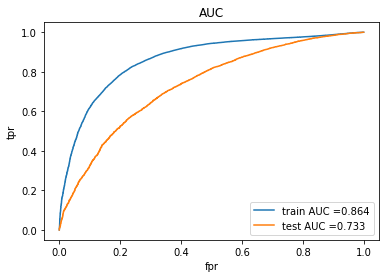

In [53]:
AUC(x2_train,Y_train,x2_test,Y_test,"l2",0.0001)

#### Observations
    1. We observe that the area under curve or the Roc plot shows that both train and test have an area of nearly
       0.864 and 0.733.
    2. After testing with various values of alpha, such an optimized result has been obtained.
    3. As alpha value increases,the data tends to underfit and as alpha values decreases,the data tends to overfit.
    3. After multiple trials, we find that the AUC is highest for alpha= 0.0001.

### Confusion Matrix

100%|██████████| 66/66 [00:00<00:00, 671.90it/s]


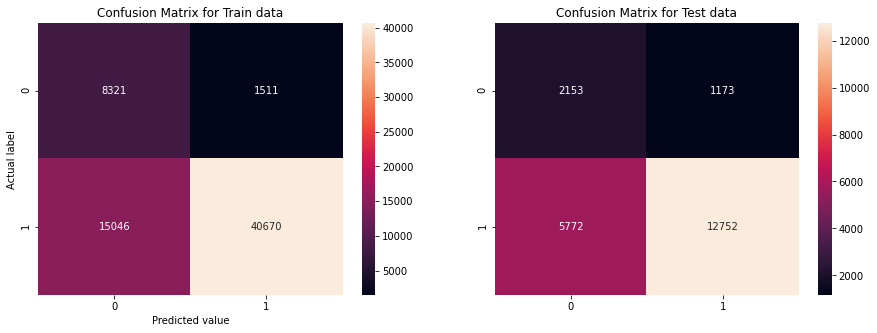

Metrics for Test data
               precision    recall  f1-score   support

           0       0.36      0.85      0.50      9832
           1       0.96      0.73      0.83     55716

    accuracy                           0.75     65548
   macro avg       0.66      0.79      0.67     65548
weighted avg       0.87      0.75      0.78     65548

Metrics for Train data
               precision    recall  f1-score   support

           0       0.27      0.65      0.38      3326
           1       0.92      0.69      0.79     18524

    accuracy                           0.68     21850
   macro avg       0.59      0.67      0.58     21850
weighted avg       0.82      0.68      0.72     21850



In [54]:
confusion(x2_train,Y_train,x2_test,Y_test,"l2",0.0001)

##### Definitions
       1.True Postive: A true positive is an outcome where the model correctly predicts the positive class.
       2.True Negative: A true negative is an outcome where the model correctly predicts the negative class.
       3.False positive: A false positive is an outcome where the model incorrectly predicts the positive class.
       4.False negative: A false negative is an outcome where the model incorrectly predicts the negative class.
#### Observations
        1. We find that the best accuracy of our model on test data is 75% 
        2. Here linear SGDclassifier performs better than Naive Bayes and KNN.
        3. The Recall is 0.73 and 0.85 for positive and negative class respectively.

### 2.4.3 Applying SVM on AVG W2V,<font color='red'> SET 3</font>

In [55]:
#emcoding data using data modelling function
x3_train, x3_test,x3_cv= data_modelling(3,data_train,data_test,data_cv)
print("The shape of training data after encoding: ",x3_train.shape , "Y_train: ", Y_train.shape)
print("The shape of testing data after encoding: ",x3_test.shape , "Y_test: ", Y_test.shape)
print("The shape of cross validation data after encoding: ",x3_cv.shape,"Y_cv: ",Y_cv.shape)

100%|██████████| 21850/21850 [00:05<00:00, 4171.01it/s]


All the features are encoded successfully and AVG-W2V is used! 
The shape of training data after encoding:  (65548, 1002) Y_train:  (65548, 1)
The shape of testing data after encoding:  (21850, 1002) Y_test:  (21850, 1)
The shape of cross validation data after encoding:  (21850, 1002) Y_cv:  (21850, 1)


### Simple Cross validation

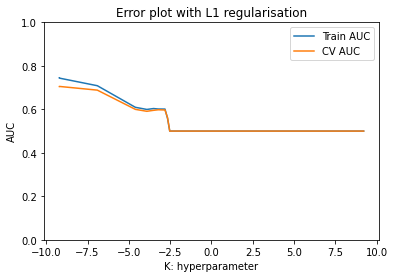

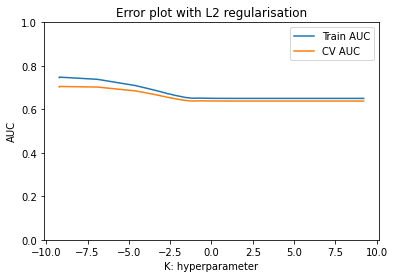

In [56]:
SCV(x3_train,Y_train,x3_cv,Y_cv,"l1",1)
SCV(x3_train,Y_train,x3_cv,Y_cv,"l2",2)

#### Observations
    1. After applying linear SGDclassifier on AVG-W2V model, the model is obtained for both L1 and L2 regularisation.
    2. L2 regularisation works better than L1 regularisation.
    2. We can find that at alpha=0.001 the model works well for both train and test cv. Hence we can consider alpha =0.001
       as our optimal hyperparameter.
    3. As alpha value increases, We can say that the model tends to underfit, and as the value of alpha decreases, the model
       overfits.
    4. As the data is unbalanced, We used the feature balanced to assign weights for majority and minority class.

### Testing with test data

100%|██████████| 66/66 [00:00<00:00, 111.65it/s]


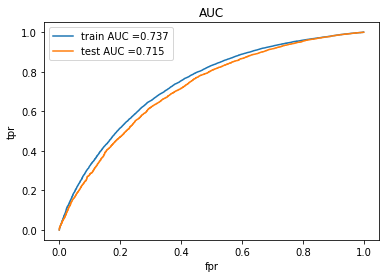

In [57]:
AUC(x3_train,Y_train,x3_test,Y_test,"l2",0.001)

#### Observations
    1. We observe that the area under curve or the Roc plot shows that both train and test have an area of nearly
       0.737 and 0.715.
    2. After testing with various values of alpha, such an optimized result has been obtained.
    3. As alpha value increases,the data tends to underfit and as alpha values decreases,the data tends to overfit.
    3. After multiple trials, we find that the AUC is highest for alpha= 0.001.

### Confusion Matrix

100%|██████████| 66/66 [00:00<00:00, 124.68it/s]


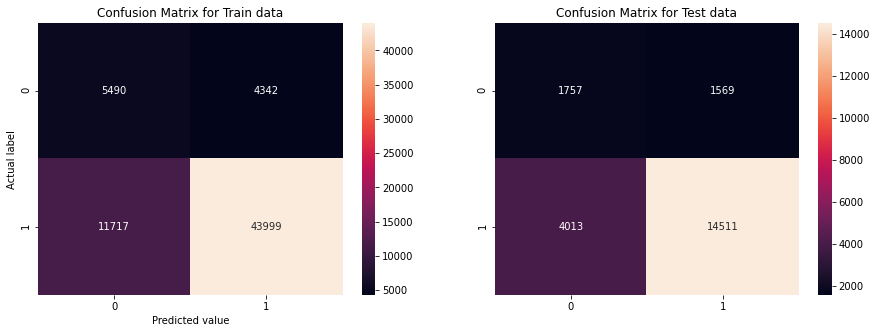

Metrics for Test data
               precision    recall  f1-score   support

           0       0.32      0.56      0.41      9832
           1       0.91      0.79      0.85     55716

    accuracy                           0.76     65548
   macro avg       0.61      0.67      0.63     65548
weighted avg       0.82      0.76      0.78     65548

Metrics for Train data
               precision    recall  f1-score   support

           0       0.30      0.53      0.39      3326
           1       0.90      0.78      0.84     18524

    accuracy                           0.74     21850
   macro avg       0.60      0.66      0.61     21850
weighted avg       0.81      0.74      0.77     21850



In [58]:
confusion(x3_train,Y_train,x3_test,Y_test,"l2",0.001)

##### Definitions
       1.True Postive: A true positive is an outcome where the model correctly predicts the positive class.
       2.True Negative: A true negative is an outcome where the model correctly predicts the negative class.
       3.False positive: A false positive is an outcome where the model incorrectly predicts the positive class.
       4.False negative: A false negative is an outcome where the model incorrectly predicts the negative class.
#### Observations
        1. We find that the best accuracy of our model on test data is 76% 
        2. Here linear SGDclassifier performs better than Naive Bayes and KNN.
        3. The Recall is 0.79 and 0.56 for positive and negative class respectively.
        4. The computation time is better than that of KNN and Logistic regression

### 2.4.3 Applying SVM on TF-IDF W2V,<font color='red'> SET 4</font>

In [59]:
#emcoding data using data modelling function
x4_train, x4_test,x4_cv= data_modelling(4,data_train,data_test,data_cv)
print("The shape of training data after encoding: ",x4_train.shape , "Y_train: ", Y_train.shape)
print("The shape of testing data after encoding: ",x4_test.shape , "Y_test: ", Y_test.shape)
print("The shape of cross validation data after encoding: ",x4_cv.shape,"Y_cv: ",Y_cv.shape)

100%|██████████| 21850/21850 [00:32<00:00, 668.61it/s]


All the features are encoded successfully and TFIDF-W2V is used! 
The shape of training data after encoding:  (65548, 1002) Y_train:  (65548, 1)
The shape of testing data after encoding:  (21850, 1002) Y_test:  (21850, 1)
The shape of cross validation data after encoding:  (21850, 1002) Y_cv:  (21850, 1)


### Simple Cross Validation

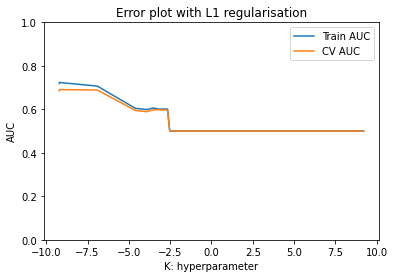

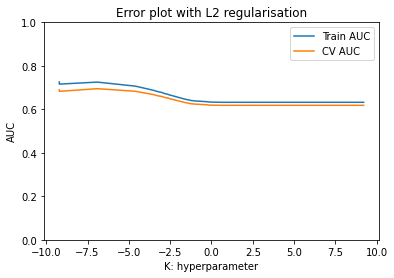

In [60]:
SCV(x4_train,Y_train,x4_cv,Y_cv,"l1",1)
SCV(x4_train,Y_train,x4_cv,Y_cv,"l2",2)

#### Observations
    1. After applying linear SGDclassifier on AVG-W2V model, the model is obtained for both L1 and L2 regularisation.
    2. L2 regularisation works better than L1 regularisation.
    2. We can find that at alpha=0.001 the model works well for both train and test cv. Hence we can consider alpha =0.001
       as our optimal hyperparameter.
    3. As alpha value increases, We can say that the model tends to underfit, and as the value of alpha decreases, the model
       overfits.
    4. As the data is unbalanced, We used the feature balanced to assign weights for majority and minority class.

### Testing with Test data

100%|██████████| 66/66 [00:00<00:00, 113.42it/s]


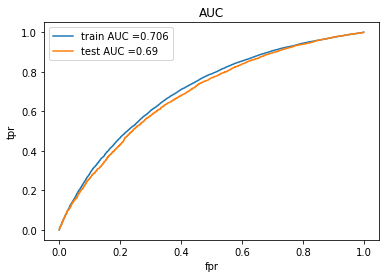

In [61]:
AUC(x4_train,Y_train,x4_test,Y_test,"l2",0.01)

#### Observations
    1. We observe that the area under curve or the Roc plot shows that both train and test have an area of nearly
       0.706 and 0.691.
    2. After testing with various values of alpha, such an optimized result has been obtained.
    3. As alpha value increases,the data tends to underfit and as alpha values decreases,the data tends to overfit.
    3. After multiple trials, we find that the AUC is highest for alpha= 0.01.

### Confusion Matrix

100%|██████████| 66/66 [00:00<00:00, 122.37it/s]


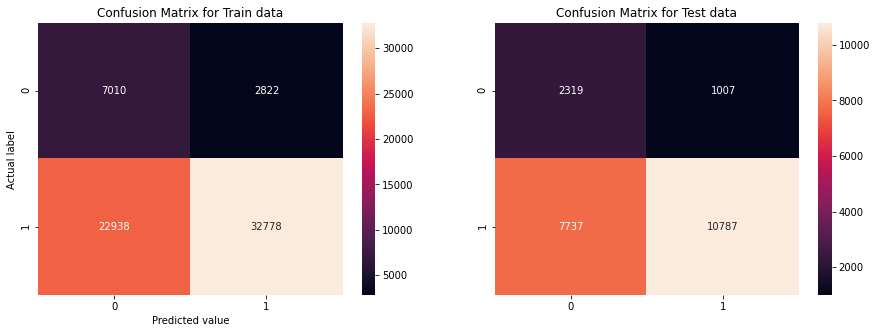

Metrics for Test data
               precision    recall  f1-score   support

           0       0.23      0.71      0.35      9832
           1       0.92      0.59      0.72     55716

    accuracy                           0.61     65548
   macro avg       0.58      0.65      0.54     65548
weighted avg       0.82      0.61      0.66     65548

Metrics for Train data
               precision    recall  f1-score   support

           0       0.23      0.70      0.35      3326
           1       0.91      0.58      0.71     18524

    accuracy                           0.60     21850
   macro avg       0.57      0.64      0.53     21850
weighted avg       0.81      0.60      0.66     21850



In [62]:
confusion(x4_train,Y_train,x4_test,Y_test,"l2",0.01)

##### Definitions
       1.True Postive: A true positive is an outcome where the model correctly predicts the positive class.
       2.True Negative: A true negative is an outcome where the model correctly predicts the negative class.
       3.False positive: A false positive is an outcome where the model incorrectly predicts the positive class.
       4.False negative: A false negative is an outcome where the model incorrectly predicts the negative class.
#### Observations
        1. We find that the best accuracy of our model on test data is 64% 
        2. Here linear SGDclassifier performs better than Naive Bayes and KNN.
        3. The Recall is 0.67 and 0.64 for positive and negative class respectively.
        4. The model may not work well since it doesn't work very efficiently. 


<h1>3. Conclusions</h1>

In [2]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model","Regularisation", "Hyper parameter", "AUC for TEST"]

x.add_row(["BOW", "Linear SGD Classifier","L2",0.01,0.744])
x.add_row(["TF-IDF", "Linear SGD Classifier","L2",0.0001,0.733])
x.add_row(["AVG-W2v", "Linear SGD Classifier","L2",0.001,0.715])
x.add_row(["TFIDF- W2V", "Linear SGD Classifier","L2",0.01,0.69])


print(x)

+------------+-----------------------+----------------+-----------------+--------------+
| Vectorizer |         Model         | Regularisation | Hyper parameter | AUC for TEST |
+------------+-----------------------+----------------+-----------------+--------------+
|    BOW     | Linear SGD Classifier |       L2       |       0.01      |    0.744     |
|   TF-IDF   | Linear SGD Classifier |       L2       |      0.0001     |    0.733     |
|  AVG-W2v   | Linear SGD Classifier |       L2       |      0.001      |    0.715     |
| TFIDF- W2V | Linear SGD Classifier |       L2       |       0.01      |     0.69     |
+------------+-----------------------+----------------+-----------------+--------------+


### Final Observations
    1. We've trained our data set with BOW,TF-IDF, AVG-W2V, TFIDF- W2V  and tested it to 
       precict whether a given project would be accepted or not.
    2. As we couldn't find any concrete paramaters for the approval/rejection of projects in EDA, it is likely that our
       our models couldn't be highly efficient(>90%) with given techniques either.
    3. The computation time significantly reduced compared to the logistic regression.
    4. We've incorporated every possible feature into the data to train the model efficiently in order to obtain good 
       results.
    5. We can also see that SGD classifier works well for higher dimensions
    6. Alpha works same hyperparamter K in KNN. As alpha increases, the model underfits and as alpha decreases, the
       model overfits.
    7. It can be observed that L2 regularisation works better than L1 regularisation in most of the models. With lesser 
       number dimensions L1 regularisation may be used.